# Import Libraries

In [2]:
# =======================
# Data Handling
# =======================
import pandas as pd       # Work with dataframes
import numpy as np        # Numerical operations

np.random.seed(42)       # Reproducible results

# =======================
# Preprocessing
# =======================
from sklearn.preprocessing import LabelEncoder   # Convert categorical text to numbers
from sklearn.preprocessing import StandardScaler  # Scale/normalize numeric features

# =======================
# Model Selection / Evaluation
# =======================
from sklearn.model_selection import train_test_split   # Split data into train/test sets
from sklearn.model_selection import GridSearchCV       # Hyperparameter tuning (grid search)
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning (randomized)
from sklearn.model_selection import cross_val_score    # Cross-validation scoring

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Metrics to evaluate model performance

# =======================
# Machine Learning Models
# =======================
from sklearn.dummy import DummyClassifier                  # Baseline model
from sklearn.linear_model import LogisticRegression        # Logistic regression
from sklearn.ensemble import RandomForestClassifier        # Random Forest
from sklearn.ensemble import GradientBoostingClassifier    # Gradient Boosting
from xgboost import XGBClassifier                          # XGBoost
from sklearn.svm import SVC                                # Support Vector Machine

# =======================
# Plotting / Visualization
# =======================
import matplotlib.pyplot as plt  # Plot graphs
import seaborn as sns            # Pretty statistical plots, heatmaps

# =======================
# Utilities
# =======================
import joblib  # Save/load trained models


## Load data

In [4]:
data_features = pd.read_csv("../DataSets/data_features.csv")
x_test = pd.read_csv("../DataSets/x_test.csv")
x_train = pd.read_csv("../DataSets/x_train.csv")
y_test = pd.read_csv("../DataSets/y_test.csv")
y_train = pd.read_csv("../DataSets/y_train.csv")

## Standardizing test and train models so they will have only numeric values (NO OBJECTS)

In [6]:
cols_to_drop = ["date", "home_team", "away_team"]

x_test['date'] = pd.to_datetime(x_test['date']) #Standardizing the date
x_test['year'] = x_test['date'].dt.year #From the date save only the year
x_test['year'] = x_test['year'].astype(int) #Save the year as integer

#Drop date column and put the year columns to the first position
year_col = x_test.pop('year') 
x_test.insert(0, 'year', year_col)
x_test.drop(columns = cols_to_drop, inplace = True)

In [7]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           23 non-null     int32  
 1   home_team_elo                  23 non-null     int64  
 2   away_team_elo                  23 non-null     int64  
 3   elo_diff                       23 non-null     int64  
 4   home_qualified                 23 non-null     int64  
 5   away_qualified                 23 non-null     int64  
 6   home_team_total_matches        23 non-null     int64  
 7   home_team_total_wins           23 non-null     int64  
 8   home_team_total_draws          23 non-null     int64  
 9   home_team_total_losses         23 non-null     int64  
 10  home_team_win_rate             23 non-null     float64
 11  home_team_draw_rate            23 non-null     float64
 12  home_team_loss_rate            23 non-null     float

In [8]:
#Exactly the same thing as in the previous cell
x_train.columns
x_train['date'] = pd.to_datetime(x_train['date'])
x_train['year'] = x_train['date'].dt.year
x_train['year'] = x_train['year'].astype(int)

year_col = x_train.pop('year')
x_train.insert(0, 'year', year_col)
x_train.drop(columns = cols_to_drop, inplace = True)

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           212 non-null    int32  
 1   home_team_elo                  212 non-null    int64  
 2   away_team_elo                  212 non-null    int64  
 3   elo_diff                       212 non-null    int64  
 4   home_qualified                 212 non-null    int64  
 5   away_qualified                 212 non-null    int64  
 6   home_team_total_matches        212 non-null    int64  
 7   home_team_total_wins           212 non-null    int64  
 8   home_team_total_draws          212 non-null    int64  
 9   home_team_total_losses         212 non-null    int64  
 10  home_team_win_rate             212 non-null    float64
 11  home_team_draw_rate            212 non-null    float64
 12  home_team_loss_rate            212 non-null    flo

In [10]:
y_test.columns

Index(['winner'], dtype='object')

In [11]:
y_train.columns

Index(['winner'], dtype='object')

# Feature Scaling

In [13]:
# Standardize all numeric features.
# This prevents large-valued features from dominating the model.
# 1) fit() learns scaling parameters from training data
# 2) transform() applies the scaling to train and test sets
# Saving the scaler allows consistent scaling when making future predictions.

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Save the scaler
joblib.dump(scaler, "../DataSets/scaler.pkl")

['../DataSets/scaler.pkl']

In [14]:
#Putting back as the pandas dataframe from numpy array
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled_df.head()

,year,home_team_elo,away_team_elo,elo_diff,home_qualified,away_qualified,home_team_total_matches,home_team_total_wins,home_team_total_draws,home_team_total_losses,...,away_team_avg_yellow_cards,away_team_clean_sheets,away_team_clean_sheet_rate,goal_diff,def_diff,xg_for_diff,xg_against_diff,win_rate_diff,home_team_encoded,away_team_encoded
0,-1.537881,0.628090,0.062164,-0.813410,0.489659,0.620984,0.965081,0.976139,-0.081665,0.921485,...,-1.351044,-0.189372,-0.011672,0.260290,0.367932,0.311629,-0.525070,0.551741,0.712730,-0.859742
1,-1.537881,-0.918391,-0.450188,-0.360163,0.489659,0.620984,1.260741,0.976139,1.303372,-0.050430,...,0.056213,0.312463,0.215237,-0.171581,-0.499355,-0.965902,0.342386,-0.289097,-0.723490,-0.129297
2,-1.537881,-0.476539,-0.991004,-0.743679,0.489659,0.620984,0.078099,0.575090,-0.774183,-0.050430,...,-1.683177,0.814298,0.359633,-0.217691,0.305786,0.521974,0.045040,0.071193,0.881698,0.447371
3,-1.537881,-0.539661,-0.336332,-0.639084,0.489659,-1.610348,1.556402,0.976139,0.610853,1.893400,...,-1.269856,-1.193041,-1.373125,1.147656,-0.924713,0.472898,0.541965,1.089901,1.515324,1.677595
4,-1.537881,-0.981512,0.602981,0.999576,0.489659,0.620984,0.965081,1.377188,0.610853,-1.022344,...,1.106735,-0.189372,-0.506746,0.793850,-0.129239,1.179578,0.779346,0.343936,-1.568326,0.870260


In [15]:
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled_df.head()

,year,home_team_elo,away_team_elo,elo_diff,home_qualified,away_qualified,home_team_total_matches,home_team_total_wins,home_team_total_draws,home_team_total_losses,...,away_team_avg_yellow_cards,away_team_clean_sheets,away_team_clean_sheet_rate,goal_diff,def_diff,xg_for_diff,xg_against_diff,win_rate_diff,home_team_encoded,away_team_encoded
0,1.744308,-0.508100,2.823173,3.196078,0.489659,-1.610348,1.260741,1.377188,0.610853,-0.05043,...,1.571720,-1.193041,-1.373125,-1.186004,-2.474230,-0.104948,1.414991,1.414706,0.248071,-0.936631
1,1.744308,-0.539661,1.314581,1.383093,0.489659,-1.610348,1.556402,0.976139,0.610853,1.89340,...,-1.838172,-1.193041,-1.373125,0.767248,-1.289305,0.867228,0.933679,1.089901,1.515324,1.370039
2,1.744308,1.858963,0.602981,-0.116107,0.489659,0.620984,-1.400204,-1.430157,-0.774183,-0.05043,...,1.106735,-0.189372,-0.506746,-0.624037,0.434222,-0.010583,0.232623,-1.353132,-0.385556,0.870260
3,1.744308,0.501847,3.563238,2.986888,0.489659,-1.610348,0.078099,0.575090,-0.774183,-0.05043,...,-3.543118,-1.193041,-1.373125,0.002773,-3.385711,-0.318930,1.133303,1.525824,0.501522,-0.513742
4,1.744308,0.091556,0.716837,-0.046377,0.489659,-1.610348,0.965081,-0.227009,1.303372,1.89340,...,-0.133226,-1.193041,-1.373125,0.828432,-1.653898,0.457553,0.737871,0.586375,-1.230392,-0.321519


## Dummy clasifier Model 1

This model does not learn anything it just simply says: Oh home_team wins 70% of the time so in the test home_team must also win 70% of the times

In [18]:
#Baseline model to compare with other models
dummy = DummyClassifier(strategy='most_frequent')

#finding the most frequent class in the model
dummy.fit(x_train, y_train)

# Predict
y_pred_dummy = dummy.predict(x_test)

# Evaluate

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)

cm_dummy = confusion_matrix(y_test, y_pred_dummy)

print("Baseline Accuracy (Most Frequent Class):", dummy_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dummy, zero_division = 0))

print("\nConfusion Matrix:")
print(cm_dummy)

Baseline Accuracy (Most Frequent Class): 0.43478260869565216

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.43      1.00      0.61        10
           2       0.00      0.00      0.00         5

    accuracy                           0.43        23
   macro avg       0.14      0.33      0.20        23
weighted avg       0.19      0.43      0.26        23


Confusion Matrix:
[[ 0  8  0]
 [ 0 10  0]
 [ 0  5  0]]


### Why did the dummy model predicted only home_wins?
#### Because the dummy model is able to predict only the most common class which was home_wins 70%

### To understand better what these words mean:

1. You want to catch all the red fish in a lake.

2. Recall = “Of all red fish in the lake, how many did you catch?”

3. Precision = “Of all fish you caught, how many were actually red?”

4. F1 = balance between catching many red fish (recall) and not catching too many wrong ones (precision).

5. support = "How many fish were there in the lake"

# Logistic Regression Model 2

In [22]:
# Initialize model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train
logreg.fit(x_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(x_test_scaled)

C:\Users\emirl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### How it works?
Logistic Regression model uses a formula: P(y=1)=1/ (1 + e^−(b0+b1* x1 *+...+bn * xn)
Where b are weights (coefficients) the model learns.

The goal: find the weights that minimize the error between predicted probabilities and actual labels.

weights are the features that are used to train the model in this case it is columns of x_train_scaled.

max_iter = how many times iterate the formula above

random_state = from which weight should we start

In [24]:
# Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_reg = confusion_matrix(y_test, y_pred_logreg)
print(cm_reg)

Logistic Regression Accuracy: 0.6521739130434783

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.83      0.50      0.62        10
           2       1.00      0.60      0.75         5

    accuracy                           0.65        23
   macro avg       0.78      0.66      0.67        23
weighted avg       0.75      0.65      0.66        23

[[7 1 0]
 [5 5 0]
 [2 0 3]]


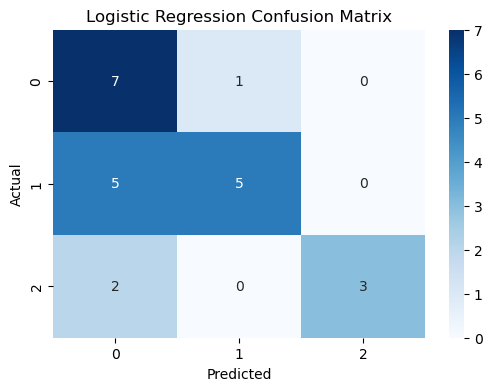

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [26]:
class_accuracy = cm_reg.diagonal() / cm_reg.sum(axis=1)
for cls, acc in enumerate(class_accuracy):
    print(f"Class {cls} accuracy: {acc:.3f}")

Class 0 accuracy: 0.875
Class 1 accuracy: 0.500
Class 2 accuracy: 0.600


## Logistic Regression Results

Achieved an overall accuracy of 65.2% on the test dataset.
The performance varied across the three classes:

Class 0:
High recall (0.88), meaning the model successfully identified most samples of class 0.
Precision was lower (0.50), suggesting many predictions for class 0 were actually wrong.

Class 1:
High precision (0.83), meaning when the model predicted class 1, it was mostly correct.
Recall was only 0.50, so it failed to detect half of the true class-1 samples.

Class 2:
Perfect precision (1.00) but moderate recall (0.60), indicating the model predicted class 2 correctly but missed some actual class-2 instances.

Overall, the model shows imbalanced performance:

It detects class 0 well,
Struggles with recall for class 1 and class 2,
And tends to be more confident than accurate for certain classes.
The confusion matrix shows that most errors came from misclassifying class 1 and class 2 samples.

# Random forest Model 3

In [29]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)

C:\Users\emirl\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### How it works:

Random Forest builds many decision trees using subsets of the training data and features.

Each tree makes a prediction for a sample, and the majority vote of all trees becomes the final prediction.

The model learns patterns from the features (x_train) to predict the target (y_train).

### Parameters:

n_estimators = number of trees in the forest.

random_state = fixes the randomness in sampling data and features so results are reproducible.

In [31]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Random Forest Accuracy: 0.8260869565217391

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.75      0.90      0.82        10
           2       1.00      1.00      1.00         5

    accuracy                           0.83        23
   macro avg       0.86      0.84      0.84        23
weighted avg       0.83      0.83      0.82        23

[[5 3 0]
 [1 9 0]
 [0 0 5]]


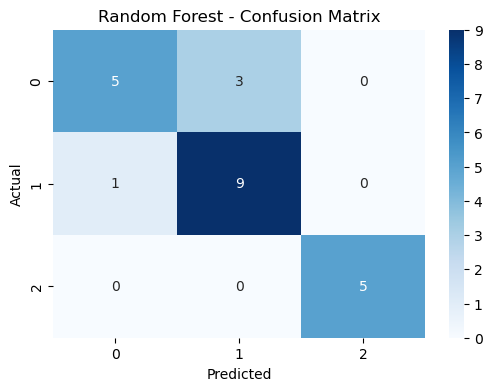

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
class_accuracy = cm_rf.diagonal() / cm_rf.sum(axis=1)
for cls, acc in enumerate(class_accuracy):
    print(f"Class {cls} accuracy: {acc:.3f}")

Class 0 accuracy: 0.625
Class 1 accuracy: 0.900
Class 2 accuracy: 1.000


## Random Forests Results

The Random Forest model achieved an overall accuracy of 82.6%, showing strong predictive performance on the classification task.

Class 0: Precision (0.83) and recall (0.62) indicate the model is good at identifying Class 0 but still misses some true Class 0 cases.

Class 1: The model performs very well on Class 1, with a recall of 0.90, meaning it correctly captures most of the samples from this class.

Class 2: Perfect performance with precision, recall, and F1 score all equal to 1.00 — the model correctly classified every instance of Class 2.

The confusion matrix confirms these results: some confusion occurs between Classes 0 and 1, but Class 2 predictions are entirely accurate. Overall, Random Forest significantly outperforms the logistic regression baseline and provides robust, reliable predictions.

Out of all real Class 0 samples → 62.5% were found correctly

Out of all predictions labeled 0 → 83% were truly Class 0

# XG BOOST MODEL 4

In [36]:
xgb = XGBClassifier(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # How much each tree contributes to the final model. 0.3 fast but risk of overfitting, 0.01 slow, but more accurate
    max_depth=6,            # How deep each tree is
    subsample=0.8,          # How many percent of training sample to use for each tree
    colsample_bytree=0.8,   # How many percent of the features to use
    random_state=42,        
    eval_metric='logloss'   # Logarithmic loss, This tells XGBoost to optimize and report logloss during training.
)

xgb.fit(x_train, y_train)   # Train the model

y_pred_xgb = xgb.predict(x_test)  # Predict

### XGBoost (Extreme Gradient Boosting)

It is similar to Random Forest but instead of making bunch of trees and then voting, it instead creating trees one after another, each correcting the errors of the earlier trees

1. A first small tree is made. It makes predictions but is not perfect.
2. XGBoost calculates the error for each training sample.
3. A new tree is trained to predict only the errors.
4. The new tree’s predictions are added to improve the model.
5. Repeat steps 2-4 for many trees.

In [38]:
#Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

XGBoost Accuracy: 0.6956521739130435

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.71      0.50      0.59        10
           2       0.83      1.00      0.91         5

    accuracy                           0.70        23
   macro avg       0.72      0.75      0.72        23
weighted avg       0.70      0.70      0.69        23

[[6 2 0]
 [4 5 1]
 [0 0 5]]


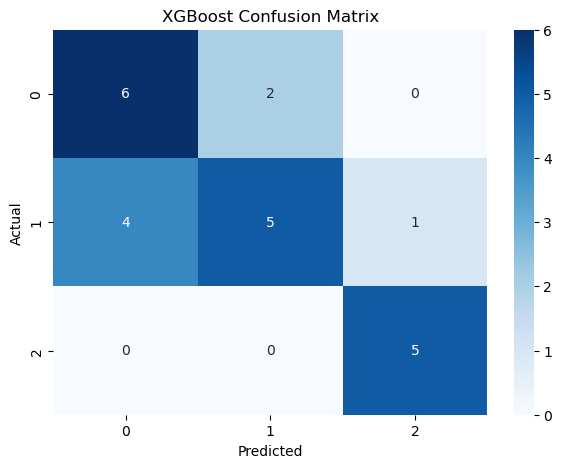

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## XGBoost Model Results

The XGBoost classifier achieved an overall accuracy of 0.6957, meaning it correctly predicted about 70% of the test samples.
Performance across the three classes shows mixed but generally strong behavior:

Class 0:
Precision 0.60, Recall 0.75, F1-score 0.67
The model correctly detected most actual class 0 samples but also made several incorrect predictions as class 0.

Class 1:
Precision 0.71, Recall 0.50, F1-score 0.59
The model struggled here, missing half of the actual class 1 samples.

Class 2:
Precision 0.83, Recall 1.00, F1-score 0.91
Strong performance with all class 2 samples correctly identified.

Overall, XGBoost shows good performance on classes 0 and 2, but class 1 remains the most difficult, reducing the overall accuracy.

## Gradient Boosting Model 5

In [42]:
# Initialize model
gb = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1, # How much each tree contributes
    random_state=42
)

# Train
gb.fit(x_train, y_train)

# Predictions
y_pred_gb = gb.predict(x_test)


C:\Users\emirl\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gradient Boosting is the parent model of the XGB therefore, the main logic of how it works is almost the same. However there are some differences:

1. Gradient Boosting is much slower.
2. Cannot handle missing values.
3. XGBoost uses an optimized tree learner with: histogram-based splitting, regularized leaf scores, advanced pruning, weighted quantile sketch.

    GradientBoostingClassifier: Uses basic CART decision trees, No special optimizations, More memory and CPU usage per tree.

In [44]:
#Accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

Gradient Boosting Accuracy: 0.6956521739130435

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.64      0.70      0.67        10
           2       0.80      0.80      0.80         5

    accuracy                           0.70        23
   macro avg       0.72      0.71      0.71        23
weighted avg       0.70      0.70      0.70        23

[[5 3 0]
 [2 7 1]
 [0 1 4]]


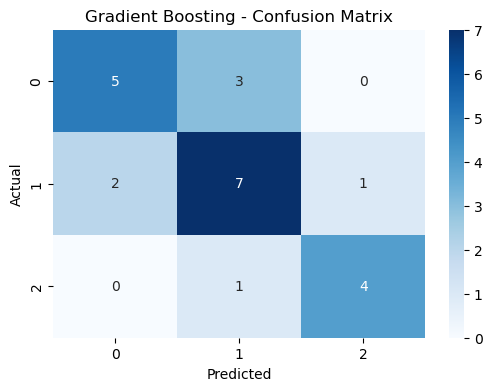

In [45]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Gradient Boosting Results

The Gradient Boosting classifier achieved an overall accuracy of 0.6957, meaning it correctly predicted about 70% of the test samples. Performance across the three classes is moderate but generally balanced:

Class 0: Precision 0.71, Recall 0.62, F1-score 0.67 The model correctly identified most class 0 samples but misclassified several as class 1.

Class 1: Precision 0.64, Recall 0.70, F1-score 0.67 The model performed reasonably, correctly detecting 70% of class 1 samples, though some were misclassified.

Class 2: Precision 0.80, Recall 0.80, F1-score 0.80 Strong performance with most class 2 samples correctly classified.

Overall, Gradient Boosting shows balanced performance across all classes, with the best results for class 2, while classes 0 and 1 exhibit some misclassifications.

## Support Vector Machine Model 6

In [48]:
# Initialize SVM
svm = SVC(
    kernel='rbf', # Use Radial Basis Function kernel
    probability=True, # Enables predict_proba()
    random_state=42
)

# Train on SCALED data
svm.fit(x_train_scaled, y_train)

# Predict on SCALED test set
y_pred_svm = svm.predict(x_test_scaled)


C:\Users\emirl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Support Vector Machine used for classification and regression. (Find the best possible line that separates the classes.)

1. Plot all the data in space. For example: if 1 feature 1D, 30 features 30D.
2. Try to find a boundary that separates the classes.
3. Use support vectors. They "support" the boundaries.
4. If data is not linearly seperable use RBF kernel

RBF kernel (Radial Basis Function)
1. Takes the data.
2. Put the data into the higher dimension (if it was 2D data puts it to 3D).
3. Makes it possible to separate them.

In [50]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6521739130434783


In [51]:
#Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

#Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

SVM Accuracy: 0.6521739130434783
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.57      0.80      0.67        10
           2       1.00      0.60      0.75         5

    accuracy                           0.65        23
   macro avg       0.75      0.63      0.66        23
weighted avg       0.70      0.65      0.65        23

[[4 4 0]
 [2 8 0]
 [0 2 3]]


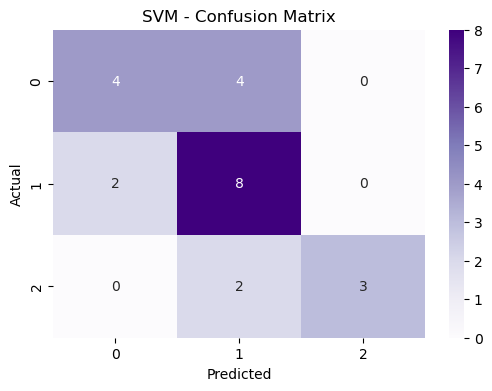

In [52]:
# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVM Results

The SVM classifier achieved an overall accuracy of 0.6522, meaning it correctly predicted about 65% of the test samples. Performance across the three classes is mixed:

Class 0: Precision 0.67, Recall 0.50, F1-score 0.57 The model correctly identified half of the actual class 0 samples but misclassified the other half, mostly as class 1.

Class 1: Precision 0.57, Recall 0.80, F1-score 0.67 The model detected most class 1 samples correctly but also predicted some other samples as class 1 incorrectly.

Class 2: Precision 1.00, Recall 0.60, F1-score 0.75 The model was very confident when predicting class 2, but it missed 40% of the actual class 2 samples.

Overall, SVM shows good confidence for class 2, decent performance on class 1, but struggles the most with class 0, leading to moderate overall accuracy.

# Model Comparison

,Model,Accuracy
0,Baseline (Dummy),43.47
1,Logistic Regression,65.21
2,Random Forest,82.61
3,XGBoost,69.56
4,Gradient Boosting,69.56
5,SVM,65.21


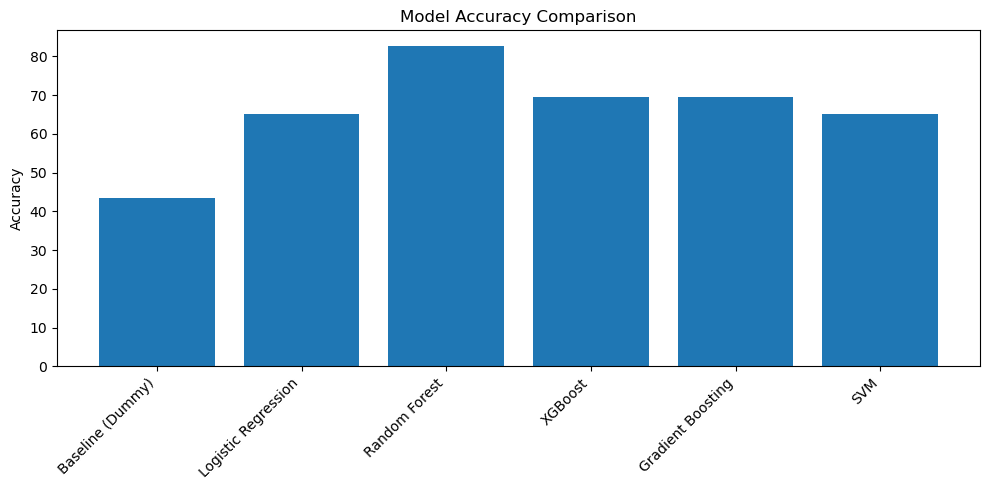

In [55]:
results = {
    "Model": [
        "Baseline (Dummy)",
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "Gradient Boosting",
        "SVM"
    ],
    "Accuracy": [
        43.47,    
        65.21,    
        82.61,    
        69.56,    
        69.56,    
        65.21      
    ]
}

df_results = pd.DataFrame(results)

# Display table
display(df_results)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


# Cross Validation

In [57]:
# Best model
best_model = rf # Random Forest

# Convert y_train to 1D NumPy array
y_train_array = y_train.to_numpy().ravel()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train_array, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Scores (5 folds):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores (5 folds): [0.48837209 0.72093023 0.64285714 0.66666667 0.64285714]
Mean CV Accuracy: 0.6323366555924694
Standard Deviation: 0.07742677588566367


## What is cross validation?

Cross-validation is a technique used to evaluate how well a machine learning model will generalize to new, unseen data. Instead of training the model once and testing it once, cross-validation splits the training data into multiple parts (called folds) and repeatedly trains/tests the model on different combinations of these folds.

#### How 5-Fold Cross-Validation Works?

1. The training data is split into 5 equal parts.

2. The model is trained on 4 parts and tested on the remaining 1 part.

3. This process repeats 5 times, each time using a different fold as the test set.

4. You end up with 5 accuracy scores, one from each fold.

In [59]:
# Save best model
joblib.dump(best_model, '../Models/best_model.pkl')

# Save scaler
joblib.dump(scaler, '../Models/scaler.pkl')

# Save feature names
feature_names = list(x_train.columns)
joblib.dump(feature_names, '../Models/feature_names.pkl')

# Test loading model
loaded_model = joblib.load('../Models/best_model.pkl')
sample_pred = loaded_model.predict(x_test[:5])        
print("Sample predictions after loading:", sample_pred)

Sample predictions after loading: [1 1 2 1 1]


In [60]:
sample_match = x_test.iloc[[0]]  # replace with any new match
sample_probs = best_model.predict_proba(sample_match)
print("Predicted probabilities [Home Win, Draw, Away Win]:", sample_probs)

Predicted probabilities [Home Win, Draw, Away Win]: [[0.16 0.79 0.05]]
